Question: 
1) Describe the change in life expectancy over the year & life expectancy in relation to GDP

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('all_data.csv')
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [211]:
df.head(20)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


In [212]:
# rename life expectancy
df = df.rename(columns={'Life expectancy at birth (years)':'LEABY'})

Text(0.5, 0, 'Life expectancy at birth (year)')

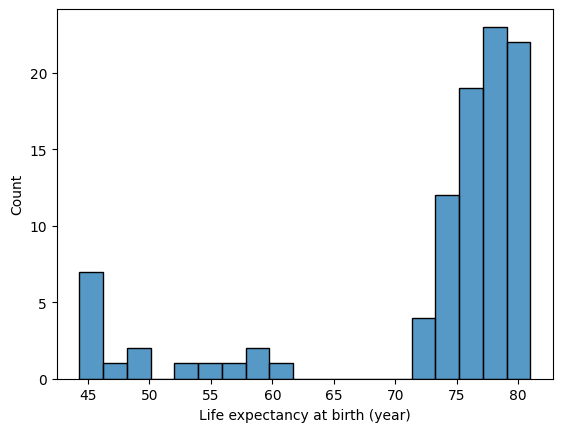

In [213]:
#distribution of LEABY
sns.histplot(df.LEABY)
plt.xlabel('Life expectancy at birth (year)')

Text(0.5, 0, 'GDP in Trillion U.S. Dollars')

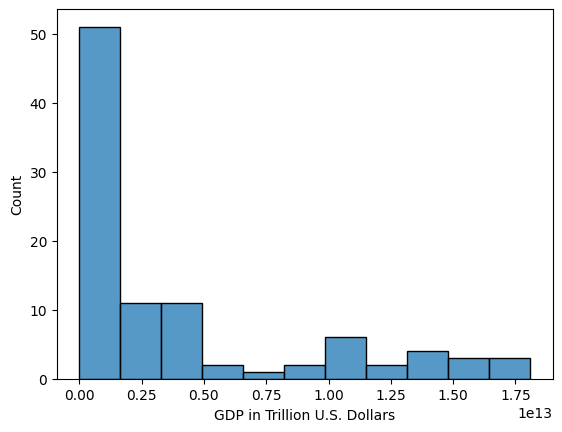

In [248]:
sns.histplot(df.GDP)
plt.xlabel('GDP in Trillion U.S. Dollars')

In [215]:
df_average = df.groupby(df['Country']).mean().reset_index()
df_average

,Country,Year,LEABY,GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


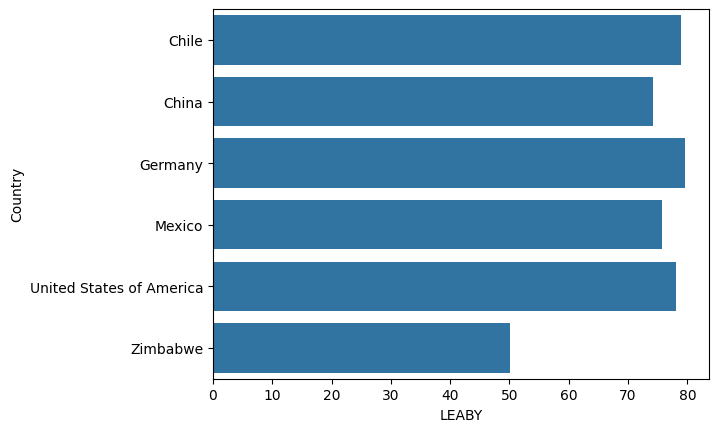

<Figure size 640x480 with 0 Axes>

In [216]:
# average LEABY by country
# plt.figure(figsize=(8,6))
sns.barplot(y='Country', x = 'LEABY', data = df_average)
plt.show()
plt.clf()

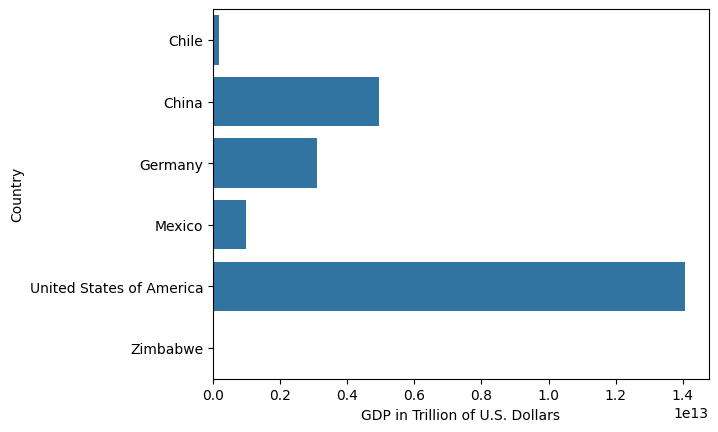

<Figure size 640x480 with 0 Axes>

In [217]:
### average GDP by country
sns.barplot( y = 'Country', x = 'GDP', data = df_average)
plt.xlabel('GDP in Trillion of U.S. Dollars')
plt.show()
plt.clf()

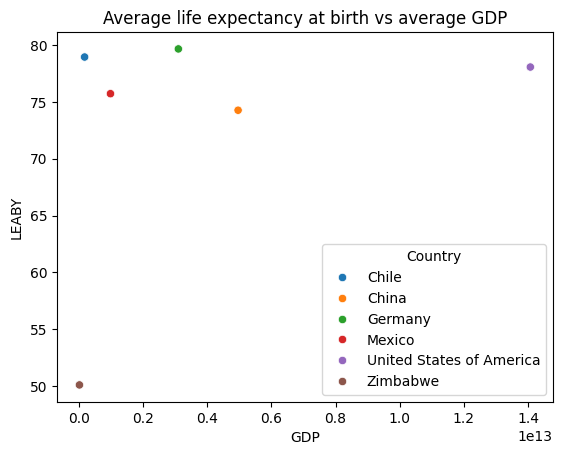

<Figure size 640x480 with 0 Axes>

In [218]:
sns.scatterplot(x = 'GDP', y = 'LEABY', data = df_average, hue = 'Country')
plt.title('Average life expectancy at birth vs average GDP')
plt.show()
plt.clf()

In [219]:
filtered_df = df[df["Country"].str.contains("Chile")]
# sns.scatterplot(x = 'Year', y  = 'Life expectancy at birth (years)', data = filtered_df)
# plt.show()
# plt.clf()

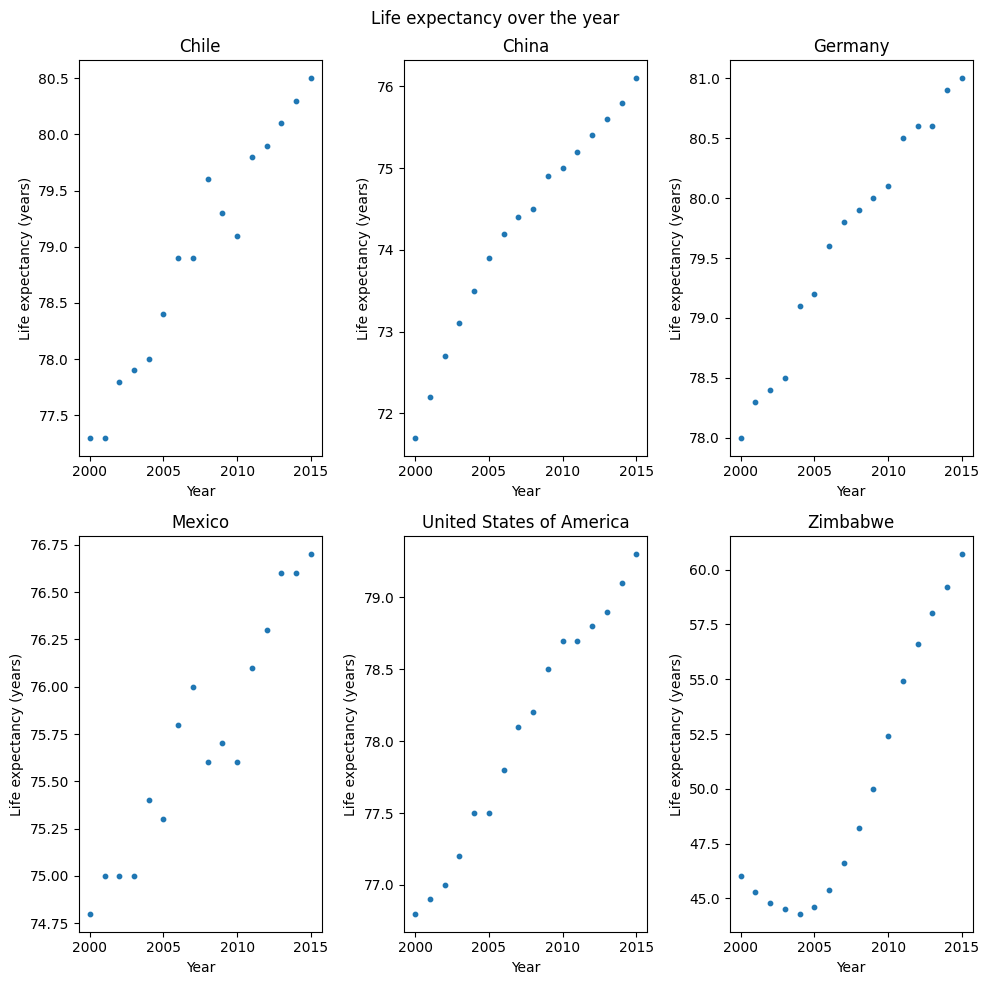

<Figure size 640x480 with 0 Axes>

In [220]:
countries = ['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

# display life expectancy over the year for all countries
fig, axs = plt.subplots(2, 3, figsize = (10, 10))
for i, ax in enumerate(axs.flatten()):
    # ax.plot(df[df.Country == countries[i]].Year, df[df.Country == countries[i]]['Life expectancy at birth (years)'])
    ax.scatter(x = 'Year', y  = 'LEABY', data = df[df.Country == countries[i]], s = 10)
    ax.set_title(f'{countries[i]}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Life expectancy (years)')
fig.suptitle('Life expectancy over the year')
plt.tight_layout()
plt.show()
plt.clf()
    
# for index in range(len(countries)):
#     plt.subplot(2, 3, index+1)
#     df_sub = df[df.Country == countries[index]]
#     sns.scatterplot(x = 'Year', y  = 'Life expectancy at birth (years)', data = df_sub)
#     plt.show()
#     plt.clf()
    

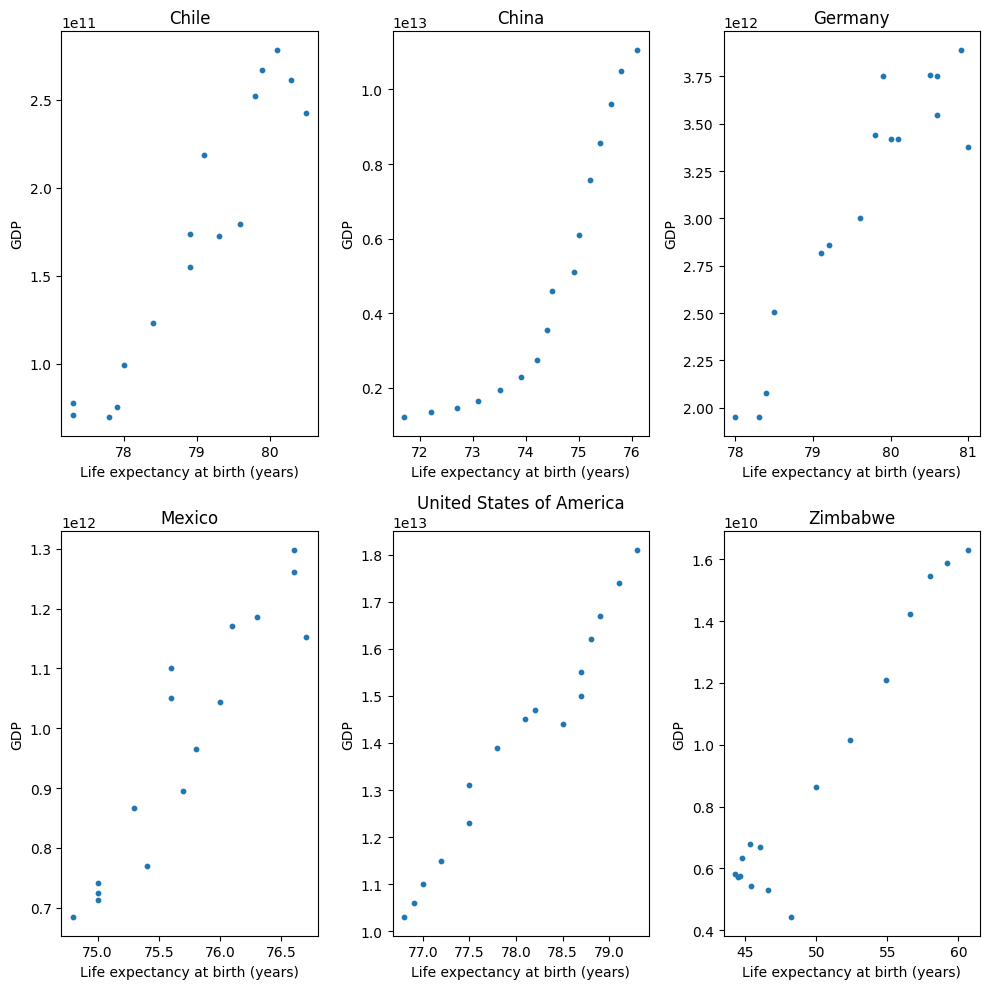

<Figure size 640x480 with 0 Axes>

In [241]:
# display life expectancy vs GDP
fig2, axs2 = plt.subplots(2, 3, figsize = (10, 10))
for i, ax in enumerate(axs2.flatten()):
    ax.scatter(x = 'LEABY', y = 'GDP', data = df[df['Country'] == countries[i]], s = 10)
    ax.set_title(f'{countries[i]}')
    ax.set_xlabel('Life expectancy at birth (years)')
    ax.set_ylabel('GDP')
plt.tight_layout()
plt.show()
plt.clf()

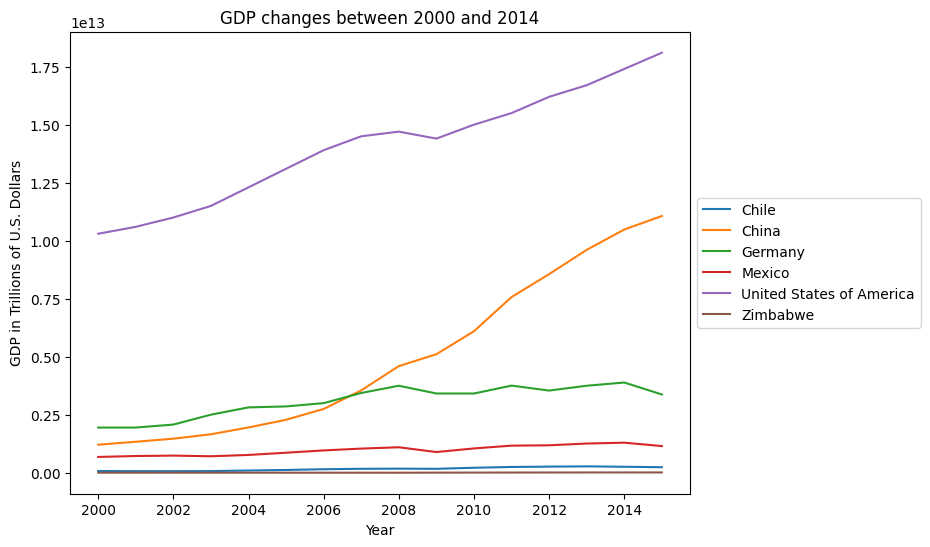

In [238]:
plt.figure(figsize = (8,6))
plt.title('GDP changes between 2000 and 2014')
sns.lineplot(x = 'Year', y = 'GDP', hue = 'Country', data = df)
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

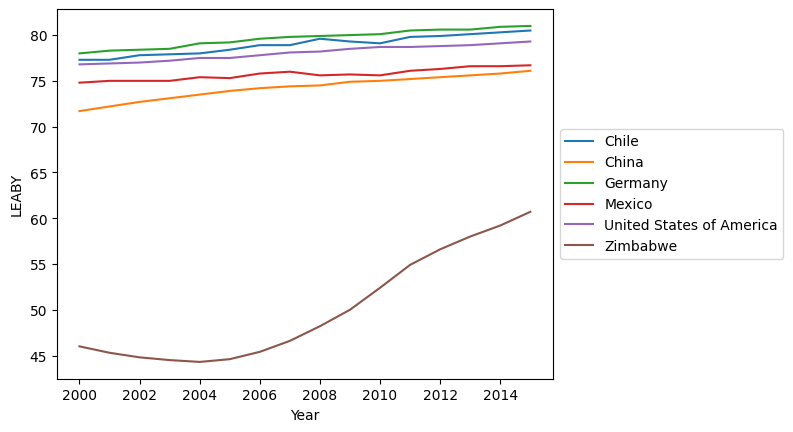

<Figure size 640x480 with 0 Axes>

In [247]:
sns.lineplot(x = "Year", y = "LEABY", hue = "Country", data = df)
plt.legend(bbox_to_anchor = (1,0.5), loc = "center left")
plt.show()
plt.clf()

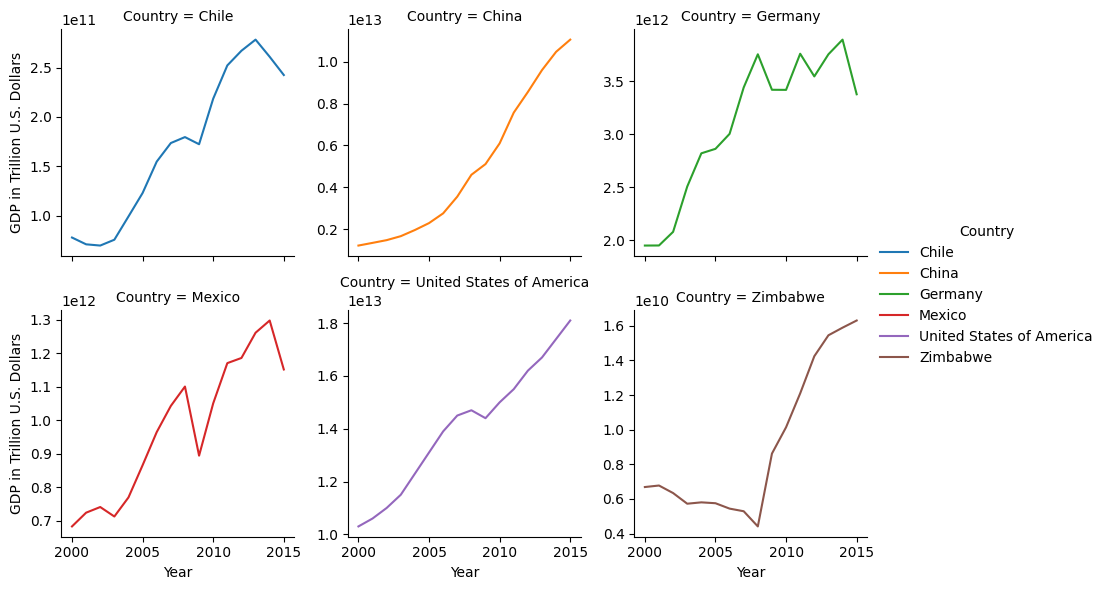

In [227]:
#GDP in each country vs year
graphGDP = sns.FacetGrid(data = df, col = 'Country', col_wrap = 3, hue = 'Country', sharey = False)
graphGDP.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels('Year', 'GDP in Trillion U.S. Dollars')

<Figure size 640x480 with 0 Axes>

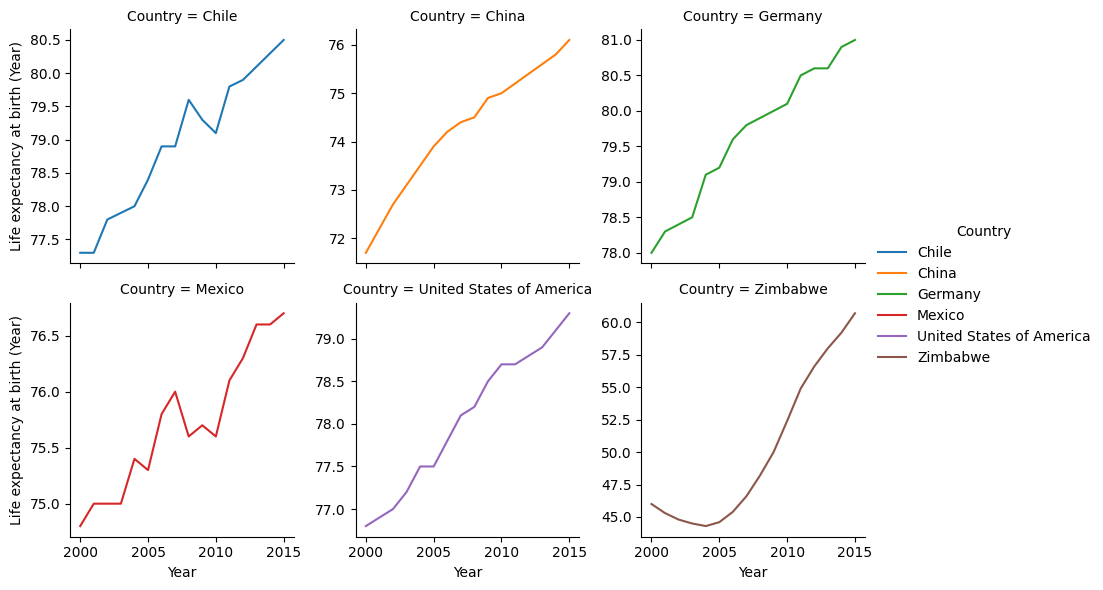

In [237]:
# LEABY change over the year

LEABYgraph = sns.FacetGrid(data = df, col = 'Country', hue = "Country", col_wrap = 3, sharey = False)
LEABYgraph.map(sns.lineplot, "Year", "LEABY").add_legend().set_axis_labels("Year", "Life expectancy at birth (Year)")


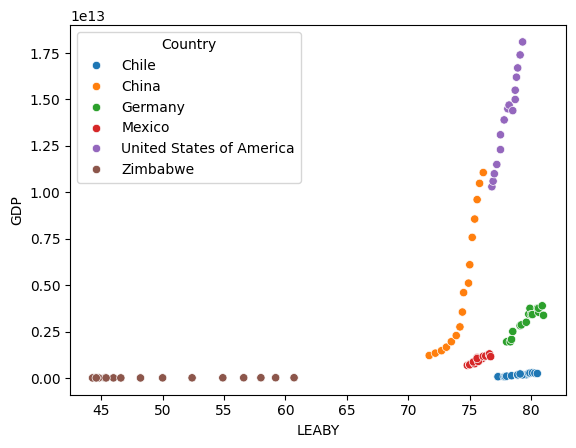

<Figure size 640x480 with 0 Axes>

In [253]:
sns.scatterplot(y = "GDP", x = "LEABY", hue = "Country", data = df)
plt.show()
plt.clf()

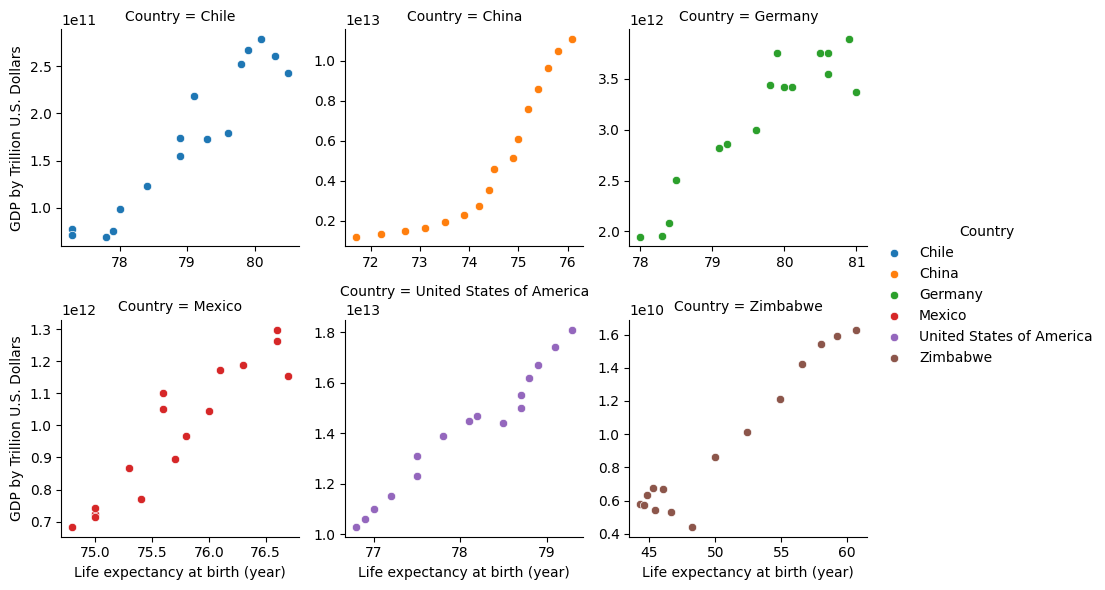

In [258]:
GLgraph = sns.FacetGrid(data = df, col = "Country", hue = "Country", col_wrap = 3, sharey = False, sharex = False)
GLgraph.map(sns.scatterplot, "LEABY", "GDP").add_legend().set_axis_labels("Life expectancy at birth (year)",
                                                                          "GDP by Trillion U.S. Dollars")